In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scripts.hand_utils import *

In [3]:
scale = 5
shift = np.array([scale, scale])

In [4]:
center_locs = np.array([[640, 360], # white
                    [402, 226], # blue-green
                    [361, 389], # green
                    [405, 551], # light green
                    [552, 626], # yellow
                    [712, 652], # orange
                    [843, 618], # light red
                    [949, 511], # red
                    [972, 355], # dark red
                    [916, 208], 
                    [815, 117], # purple
                    [676,  81], # dark blue
                    [516,  60]] # blue
                     )

In [5]:
def getMatchCenter(mat, center):
    return mat.dot(np.array([*center, 1]).reshape(-1,1)).reshape(-1)[:2].astype(np.int_)

In [6]:
def getPatch(img, center, scale=5):
    return img[center[1] - scale:center[1] + scale,
            center[0] - scale:center[0] + scale,:]

In [15]:
usb_img = cv2.imread("/home/pi/usb_cam.jpg")
usb_img_rgb = cv2.cvtColor(usb_img,cv2.COLOR_BGR2RGB)

csi_img = cv2.imread("/home/pi/csi_cam.jpg")
csi_img_rgb = cv2.cvtColor(csi_img,cv2.COLOR_BGR2RGB)

In [16]:
usb_patches = [getPatch(usb_img, center, scale=scale) for center in center_locs ]
csi_patches = [getPatch(csi_img, getMatchCenter(M, center), scale=scale) for center in center_locs ]

In [17]:
usb_patches_hsv = [cv2.cvtColor(patch, cv2.COLOR_RGB2HSV) for patch in usb_patches]
csi_patches_hsv = [cv2.cvtColor(patch, cv2.COLOR_RGB2HSV) for patch in csi_patches]

In [18]:
usb_color_list = np.vstack([np.mean(patch,axis=(0,1)) for patch in usb_patches])

In [19]:
csi_color_list = np.vstack([np.mean(patch,axis=(0,1)) for patch in csi_patches])

In [1]:
usb_img_rect = usb_img_rgb.copy()
for center in center_locs:
    usb_img_rect = cv2.rectangle(usb_img_rect, center-shift, center+shift, (255, 0,0), 1 )
plt.imshow(usb_img_rect)

In [2]:
csi_img_rect = csi_img_rgb.copy()
for center in center_locs:
    csi_img_rect = cv2.rectangle(csi_img_rect, getMatchCenter(M, center)-shift, getMatchCenter(M, center)+shift, (255, 0,0), 1 )
plt.imshow(csi_img_rect)

In [70]:
usb_color_pred = [detColor(patch, grey_thresh=20) for patch in usb_patches]
csi_color_pred = [detColor((patch-np.array([0,16,0]).reshape(1,-1)).astype(np.uint8), grey_thresh=15) for patch in csi_patches]

color: 灰	 h:  0.0	 s:  0.0	 v: 190.0
color: 青	 h: 77.0	 s: 93.6	 v: 120.5
color: 绿	 h: 56.0	 s: 93.4	 v: 117.6
color: 绿	 h: 44.0	 s: 111.2	 v: 121.6
color: 黄	 h: 27.2	 s: 170.4	 v: 164.9
color: 橙	 h: 19.1	 s: 192.6	 v: 147.0
color: 红	 h:  8.3	 s: 184.5	 v: 137.0
color: 红	 h:  5.7	 s: 200.6	 v: 135.8
color: 红	 h: 79.1	 s: 184.1	 v: 147.7
color: 紫	 h: 125.0	 s: 148.7	 v: 93.8
color: 紫	 h: 139.0	 s: 132.6	 v: 103.8
color: 蓝	 h: 115.0	 s: 145.4	 v: 126.4
color: 蓝	 h: 109.2	 s: 157.9	 v: 158.3
color: 灰	 h: 109.6	 s: 24.8	 v: 117.1
color: 青	 h: 88.0	 s: 189.5	 v: 64.6
color: 青	 h: 78.9	 s: 178.5	 v: 61.7
color: 绿	 h: 70.4	 s: 144.9	 v: 65.6
color: 黄	 h: 25.9	 s: 163.9	 v: 95.2
color: 橙	 h: 13.0	 s: 166.6	 v: 96.2
color: 红	 h:  3.0	 s: 168.7	 v: 96.8
color: 红	 h: 178.7	 s: 172.3	 v: 101.9
color: 红	 h: 174.3	 s: 181.8	 v: 107.9
color: 紫	 h: 131.0	 s: 145.8	 v: 67.0
color: 紫	 h: 137.3	 s: 133.7	 v: 72.3
color: 蓝	 h: 111.1	 s: 170.0	 v: 82.5
color: 蓝	 h: 106.1	 s: 199.7	 v: 102.2


In [63]:
usb_color_pred

['color: 灰\t h:  0.0\t s:  0.0\t v: 190.0',
 'color: 青\t h: 77.0\t s: 93.6\t v: 120.5',
 'color: 绿\t h: 56.0\t s: 93.4\t v: 117.6',
 'color: 绿\t h: 44.0\t s: 111.2\t v: 121.6',
 'color: 黄\t h: 27.2\t s: 170.4\t v: 164.9',
 'color: 橙\t h: 19.1\t s: 192.6\t v: 147.0',
 'color: 红\t h:  8.3\t s: 184.5\t v: 137.0',
 'color: 红\t h:  5.7\t s: 200.6\t v: 135.8',
 'color: 红\t h: 79.1\t s: 184.1\t v: 147.7',
 'color: 紫\t h: 125.0\t s: 148.7\t v: 93.8',
 'color: 紫\t h: 139.0\t s: 132.6\t v: 103.8',
 'color: 蓝\t h: 115.0\t s: 145.4\t v: 126.4',
 'color: 蓝\t h: 109.2\t s: 157.9\t v: 158.3']

In [64]:
csi_color_pred

['color: 灰\t h: 77.7\t s: 40.1\t v: 125.6',
 'color: 青\t h: 81.0\t s: 202.8\t v: 80.6',
 'color: 绿\t h: 73.9\t s: 194.1\t v: 77.7',
 'color: 绿\t h: 66.9\t s: 166.7\t v: 81.6',
 'color: 黄\t h: 32.9\t s: 170.1\t v: 102.0',
 'color: 橙\t h: 20.6\t s: 166.6\t v: 96.2',
 'color: 橙\t h: 10.0\t s: 168.7\t v: 96.8',
 'color: 红\t h:  5.7\t s: 165.3\t v: 101.9',
 'color: 红\t h:  0.4\t s: 148.0\t v: 107.9',
 'color: 蓝\t h: 116.0\t s: 98.5\t v: 67.0',
 'color: 紫\t h: 128.0\t s: 78.1\t v: 72.6',
 'color: 蓝\t h: 103.0\t s: 170.0\t v: 82.5',
 'color: 蓝\t h: 100.0\t s: 199.7\t v: 102.2']

In [65]:
idx = 0

In [66]:
usb_color_list[idx]

array([190., 190., 190.])

In [61]:
csi_color_list[idx]

array([117.07, 125.59, 105.69])

In [58]:
usb_color_list[idx]/csi_color_list[idx]

array([0.9441131 , 0.90076661, 1.36842105])

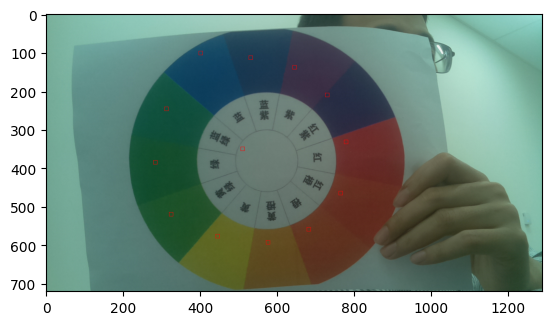

In [41]:
csi_img_rect = csi_img_rgb.copy()
for center in center_locs:
    csi_img_rect = cv2.rectangle(csi_img_rect, getMatchCenter(M, center)-shift, getMatchCenter(M, center)+shift, (255, 0,0), 1 )
plt.imshow(csi_img_rect)

In [27]:
csi_img_rect = cv2.rectangle(csi_img_rgb, getMatchCenter(M, center_loc)-shift, getMatchCenter(M, center_loc)+shift, (255, 0,0), 1 )

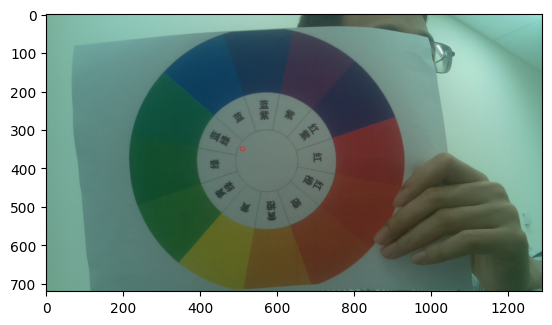

In [28]:
plt.imshow(csi_img_rect)

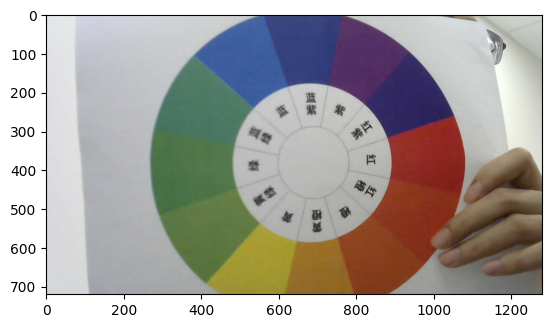

In [6]:
plt.imshow(usb_img)

#### Image alignment

In [8]:
sift = cv2.SIFT_create()

In [9]:
usb_img = cv2.imread("/home/pi/usb_cam.jpg")
usb_img_gray = cv2.cvtColor(usb_img, cv2.COLOR_BGR2GRAY)
usb_kp, usb_des = sift.detectAndCompute(usb_img_gray, None)

In [10]:
csi_img = cv2.imread("/home/pi/csi_cam.jpg")
csi_img_gray = cv2.cvtColor(csi_img, cv2.COLOR_BGR2GRAY)
csi_kp, csi_des = sift.detectAndCompute(csi_img_gray, None)

In [11]:
FLANN_INDEX_KDTREE = 0  # 建立FLANN匹配器的参数
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)  # 配置索引，密度树的数量为5
search_params = dict(checks=50)  # 指定递归次数
match = cv2.FlannBasedMatcher(index_params, search_params)  # 建立匹配器
matches = match.knnMatch(usb_des, csi_des, k=2)  # 得到匹配的关键点

In [12]:
good = []  # 良好的匹配点
for m, n in matches:  # 通过比值测试筛选出好的匹配点
    if m.distance < 0.75 * n.distance:  # 0.75是经验值
        good.append([m])

In [13]:
src_pts = np.float32([usb_kp[m[0].queryIdx].pt for m in good]).reshape(-1, 1, 2)  
# queryIdx是第一幅图像中的描述子索引
dst_pts = np.float32([csi_kp[m[0].trainIdx].pt for m in good]).reshape(-1, 1, 2)  
# trainIdx是第二幅图像中的描述子索引

In [14]:
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)  
# 获取单应性矩阵，RANSAC是随机采样一致性算法，作用是去除异常值，
#原理：随机选择一些点，计算出单应性矩阵，然后计算所有点到单应性矩阵的距离，距离小于阈值的点认为是内点，
#然后计算内点的比例，如果比例大于设定的阈值，就认为这个单应性矩阵是正确的，否则就重新随机选择一些点，
#计算单应性矩阵，直到达到设定的迭代次数

In [15]:
M

array([[ 8.13264065e-01,  2.69893440e-02, -1.91732908e+01],
       [-3.91536486e-02,  8.43665774e-01,  7.13676931e+01],
       [-6.69934183e-05,  2.00012444e-05,  1.00000000e+00]])

In [18]:
csi_img.shape

(720, 1290, 3)

In [54]:
usb_img.shape

(720, 1280, 3)

In [69]:
M.dot(np.array([640, 360,1]).reshape(-1,1))

array([[518.4356284 ],
       [354.97103881],
       [  0.97814418]])

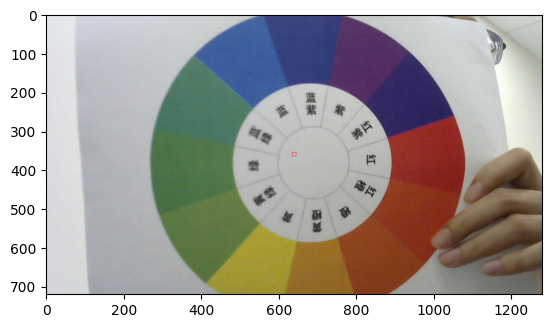

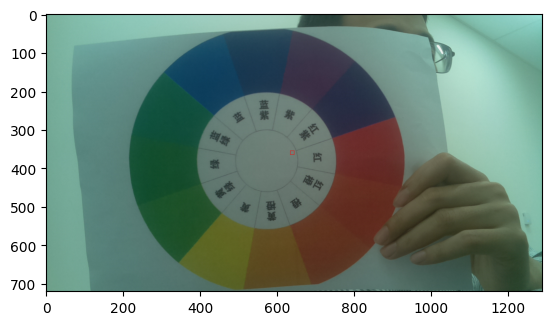

In [26]:
csi_img_rect = cv2.rectangle(csi_img, center_loc-shift, center_loc+shift, (255, 0,0), 1 )
plt.imshow(csi_img_rect)

In [ ]:
[402, 226] # blue-green
[361, 389] # green
[405, 551] # light green
[552, 626] # yellow
[712, 652] # orange
[843, 618] # light red
[949, 511] # red
[972, 355] # dark red
[916, 208] 
[815, 117] # purple
[676,  81] # dark blue
[516,  60] # blue

<IPython.core.display.Javascript object>


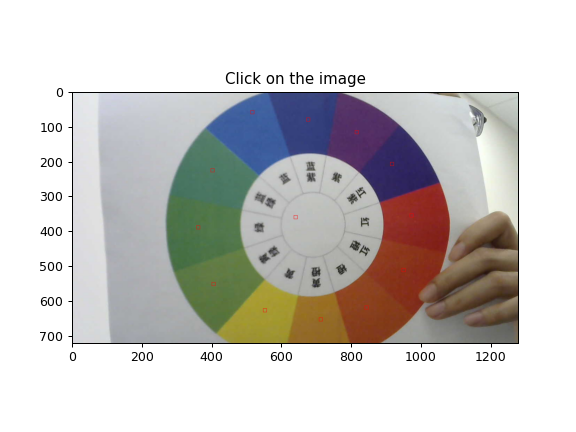

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
img = cv2.imread("/home/pi/usb_cam.jpg")

# Define a callback function for the mouse event
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print("Mouse position: ", (x, y))
        font = cv2.FONT_HERSHEY_SIMPLEX
        strXY = str(x) + ", " + str(y)
        cv2.putText(img, strXY, (x, y), font, .5, (255,255,0), 2)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Click on the image")

# Set the mouse callback function
plt.gcf().canvas.mpl_connect("button_press_event", click_event)

# Show the plot
plt.show()

In [74]:
import picamera

In [75]:
camera = picamera.PiCamera()
camera.awb_mode = 'off'
camera.awb_gains = (1.5, 1.5)
camera.capture('image.jpg')

In [33]:
from scripts.dehaze_utils import *

In [34]:
src = cv2.imread("/home/pi/csi_cam.jpg")

In [35]:
I = src.astype('float64')/255;

In [36]:
dark = DarkChannel(I,15);
A = AtmLight(I,dark);
te = TransmissionEstimate(I,A,15);
t = TransmissionRefine(src,te);
J = Recover(I,t,A,0.1);

In [41]:
res = ((J-J.min())/(J.max()-J.min())*255).astype(np.uint8)

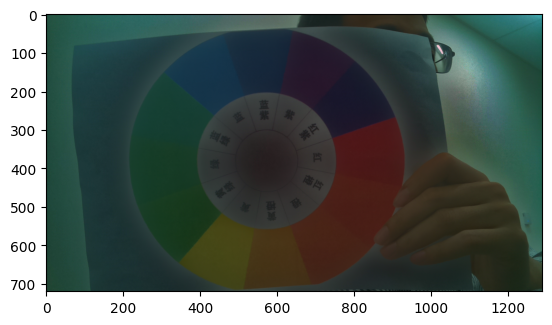

In [43]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

1.4498094409245659